Yikai Zhang

Arrest in Pittsburgh

In [1]:
import pandas as pd
import geopandas
Arrest = pd.read_csv("Arrest in Pittsburgh.csv")
import matplotlib.pyplot as plt
Arrest.iloc[:,:]

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61555,2056910,23037087,43.0,M,W,2023-04-04T02:50:00,"600 Block 1st AV Pittsburgh, PA 15219",3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...,"2700 Block Brownsville RD Pittsburgh, PA 15227",Carrick,3,2904.0,4.0,3.0,-79.978081,40.384338
61556,2056911,23037098,23.0,M,B,2023-03-13T02:00:00,"Glen Mawr ST & W Carson ST Pittsburgh, PA 15204",3925 Receiving Stolen Property. / 6106 Firearm...,"Glen Mawr ST & W Carson ST Pittsburgh, PA 15204",Sheraden,6,2018.0,2.0,5.0,-80.041111,40.454694
61557,2056912,23037112,37.0,M,B,2023-03-13T00:01:00,"2200 Block Centre AV Pittsburgh, PA 15219",9501 Bench Warrant,"2200 Block Centre AV Pittsburgh, PA 15219",Middle Hill,2,501.0,6.0,3.0,-79.975990,40.445162
61558,2056913,23037115,25.0,M,B,2023-03-13T03:22:00,"700 Block Mt Pleasant RD Pittsburgh, PA 15214",6106 Firearms not to be Carried without a Lice...,"700 Block Mt Pleasant RD Pittsburgh, PA 15214",Northview Heights,1,2609.0,1.0,1.0,-79.998241,40.476000


In [2]:
Arrest.shape

(61560, 16)

In [3]:
import pandas as pd
Arrest = pd.read_csv("Arrest in Pittsburgh.csv")
import matplotlib.pyplot as plt
Arrest[['INCIDENTNEIGHBORHOOD']]

,INCIDENTNEIGHBORHOOD
0,Bloomfield
1,Outside City
2,Westwood
3,East Allegheny
4,Crafton Heights
...,...
61555,Carrick
61556,Sheraden
61557,Middle Hill
61558,Northview Heights


In [4]:
Arrest['INCIDENTNEIGHBORHOOD'].value_counts()

Central Business District    3812
South Side Flats             3199
Carrick                      2204
East Allegheny               2027
Homewood South               1951
                             ... 
Ridgemont                      35
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

In [5]:
arresttotal = Arrest.groupby('INCIDENTNEIGHBORHOOD').count()['OFFENSES']
arresttotal.sort_values(ascending=True)

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood         2
Troy Hill-Herrs Island          6
Mt. Oliver Boro                18
Central Northside              23
Ridgemont                      35
                             ... 
Homewood South               1950
East Allegheny               2026
Carrick                      2204
South Side Flats             3199
Central Business District    3812
Name: OFFENSES, Length: 98, dtype: int64

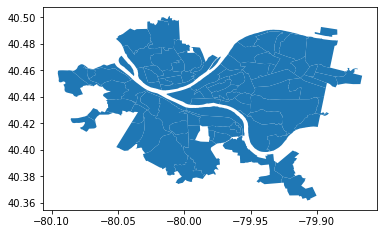

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot() 

In [7]:
arrest_map = neighborhoods.merge(arresttotal, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

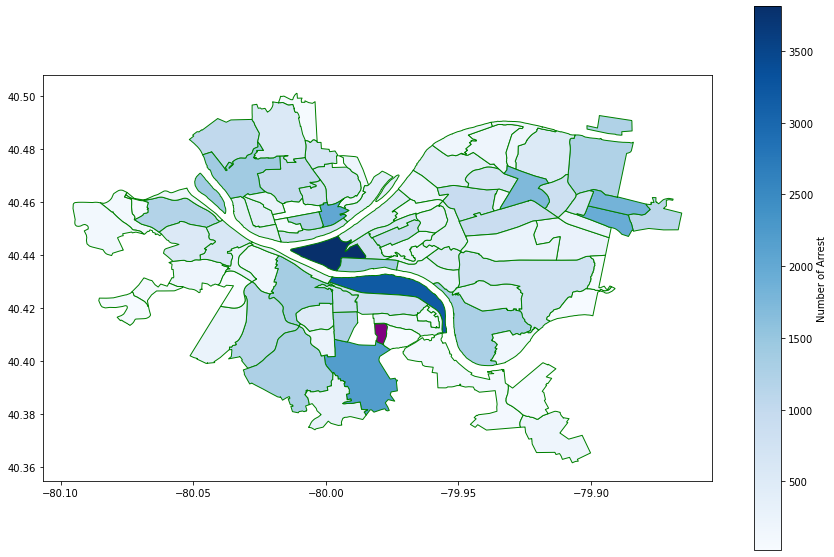

In [15]:
arrest_map.plot(column='OFFENSES', 
cmap='Blues',             
edgecolor="green",        
legend=True,              
legend_kwds={'label': "Number of Arrest"}, 
figsize=(15, 10),        
missing_kwds={"color": "purple"} )